**Fake news classifier using LSTM (Long short time Memory) **
In this project we are using ISOT Fake News Dataset which consists of Two files Fake.csv & True.csv.

In [3]:
import numpy as np
import pandas as pd
import nltk

from collections import defaultdict
import re



df_fake = pd.read_csv('/content/drive/MyDrive/Colab Dataset/Fake.csv')
df_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Here we just need  Title,text and label and remove extra titiles

In [4]:

df_fake=df_fake.drop(['subject','date'],axis=1)

df_fake['label'] ='FAKE'

df_fake.head()


,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


We are processing the true dataset and furthur merging with df_fake data frame for final dataset.

In [5]:
df_true=pd.read_csv('/content/drive/MyDrive/Colab Dataset/True.csv')

df_true=df_true.drop(['subject','date'],axis=1)
df_true['label']='TRUE'
df= pd.concat([df_true, df_fake], ignore_index=True)
df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


Here the dataset is merged and sequence of True and False Labels so we need to shuffle in the dataset for randomness in dataset.

In [6]:
df=df.reindex(np.random.permutation(df.index))
df.head()

,title,text,label
7878,"Trump may have stopped the bleeding, but not t...",WASHINGTON (Reuters) - Donald Trump may have ...,TRUE
15080,Yemen says Saudi-led coalition to allow commer...,ADEN (Reuters) - The Saudi-led military coalit...,TRUE
26491,WATCH: Trump Supporter Claims Confederate Fla...,It s truly sad that southern conservatives don...,FAKE
41499,HOLLYWOOD LIBS Raise Big Money For #CrookedHil...,The Democratic presidential nominee is in the...,FAKE
5300,"Pence, Bannon appeal for conservatives to unit...",WASHINGTON (Reuters) - U.S. Vice President Mik...,TRUE


For regular expression

In [7]:
import re
# function for extracting desired text using regex
def extract_txt(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
#applying regex function to retain only relevant text
df['text_processed'] = df['text'].apply(extract_txt)

#checking dataframe containing only True News
df[df.label=="TRUE"]

,title,text,label,text_processed
7878,"Trump may have stopped the bleeding, but not t...",WASHINGTON (Reuters) - Donald Trump may have ...,TRUE,Donald Trump may have done just enough in Sund...
15080,Yemen says Saudi-led coalition to allow commer...,ADEN (Reuters) - The Saudi-led military coalit...,TRUE,The Saudi-led military coalition fighting agai...
5300,"Pence, Bannon appeal for conservatives to unit...",WASHINGTON (Reuters) - U.S. Vice President Mik...,TRUE,U.S. Vice President Mike Pence and other top W...
6946,Trump moves to quickly fill his top Cabinet ranks,NEW YORK (Reuters) - U.S. President-elect Dona...,TRUE,U.S. President-elect Donald Trump said he expe...
15318,"Pentagon confirms rare, three aircraft carrier...",WASHINGTON (Reuters) - The Pentagon said on We...,TRUE,The Pentagon said on Wednesday it would soon c...
...,...,...,...,...
12006,Egypt security forces kill five suspected mili...,CAIRO (Reuters) - Egyptian security forces on ...,TRUE,Egyptian security forces on Monday killed five...
19213,U.S.-backed forces capture big gas field in Sy...,AMMAN (Reuters) - U.S.-backed forces said on S...,TRUE,U.S.-backed forces said on Saturday they had s...
18943,Pakistan finance minister denies corruption ch...,ISLAMABAD (Reuters) - Pakistani Finance Minist...,TRUE,Pakistani Finance Minister Ishaq Dar pleaded n...
1391,NRA calls for more regulation after Vegas shoo...,WASHINGTON (Reuters) - The National Rifle Asso...,TRUE,The National Rifle Association said on Thursda...


Data **Cleaning**

In [8]:
# drop extra column
df = df.drop(['text'],axis=1)
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()

,title,label,text_processed
7878,"Trump may have stopped the bleeding, but not t...",0,Donald Trump may have done just enough in Sund...
15080,Yemen says Saudi-led coalition to allow commer...,0,The Saudi-led military coalition fighting agai...
26491,WATCH: Trump Supporter Claims Confederate Fla...,1,It s truly sad that southern conservatives don...
41499,HOLLYWOOD LIBS Raise Big Money For #CrookedHil...,1,The Democratic presidential nominee is in the...
5300,"Pence, Bannon appeal for conservatives to unit...",0,U.S. Vice President Mike Pence and other top W...


In [9]:
#combining text_processed and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_processed']

# now we can delete extra columns
cols_del =['title','text_processed']
df = df.drop(cols_del,axis=1)

df.head()

,label,final_news
7878,0,"Trump may have stopped the bleeding, but not t..."
15080,0,Yemen says Saudi-led coalition to allow commer...
26491,1,WATCH: Trump Supporter Claims Confederate Fla...
41499,1,HOLLYWOOD LIBS Raise Big Money For #CrookedHil...
5300,0,"Pence, Bannon appeal for conservatives to unit..."


IN below code there is lowercase of the data, although it is commonly overlooked, it is one of the most effective techniques when the data is small. Although the word ‘Better’, ‘better’ and ‘BETTER’ are the same but the neural net model will assign different weights to it resulting in abrupt output which will affect the overall performance of the model.Further, we will remove the stopwords and all non-alphabetic characters from the dataset.
Creating list of possible stopwords from nltk library

In [10]:
#  # Install the nltk module
# !pip install nltk

# # Import the nltk.corpus module
import nltk
import nltk.corpus

# # Download the stopwords list
nltk.download('stopwords')

# Define the stopwords list
stop = nltk.corpus.stopwords.words('english')

# Define the cleanText function
def cleanText(txt):
  # Lowercase the text
  txt = txt.lower()
  # Remove stopwords
  txt = ' '.join([word for word in txt.split() if word not in (stop)])
  # Remove non-alphabetic characters
  txt = re.sub('[^a-z]',' ',txt)
  return txt

# Apply the cleanText function to the final_news column
df['final_news'] = df['final_news'].apply(cleanText)

# Display the first few rows of the DataFrame
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,final_news
7878,0,trump may stopped bleeding worrying donald tr...
15080,0,yemen says saudi led coalition allow commercia...
26491,1,watch trump supporter claims confederate flag...
41499,1,hollywood libs raise big money crookedhillary...
5300,0,pence bannon appeal conservatives unite behin...


we will use Global vectors for word representation (GLOVE) word embeddings. It is an unsupervised learning algorithm for obtaining vector representations for words.So,now we will set the file path of the Glove embeddings file and will do configuration settings

In [11]:
# import os
# import pandas as pd
# path = '/content/drive/MyDrive'

# # !wget http://nlp.stanford.edu/data/glove.6B.zip
# # !unzip glove.6B.zip
# # EMBEDDING_FILE=f'{path}/glove.6B.50d.txt'

# os.chdir(path)

# # Download the GloVe embeddings
# !wget http://nlp.stanford.edu/data/glove.6B.zip

# # Unzip the GloVe embeddings
# !unzip glove.6B.zip

# # Define the embedding file path
# EMBEDDING_FILE = os.path.join(path, 'glove.6B.50d.txt')
!pip install kaggle

import os
from zipfile import ZipFile

# Define the path to your Google Drive
path = '/content/drive/MyDrive'

# Upload kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the GloVe embeddings from Kaggle
!kaggle datasets download -d 'watts2/glove6b50dtxt'

# Unzip the GloVe file
with ZipFile('glove6b50dtxt.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

# Define the embedding file path
EMBEDDING_FILE = os.path.join(path, 'glove.6B.50d.txt')

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 10


# creating feature and target variable
X = df.drop(['label'],axis=1)
y = df['label'].values

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/watts2/glove6b50dtxt
License(s): CC0-1.0
 99% 67.0M/67.7M [00:04<00:00, 25.3MB/s]
100% 67.7M/67.7M [00:04<00:00, 16.0MB/s]


we will convert sentences (texts) into integers as we know any machine learning  model doesn’t understand textual data so we have to convert it into number of representation.

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec


X = df.drop(['label'],axis=1)
y = df['label'].values

# convert X['final_news'] to a list of strings
X['final_news'] = list(X['final_news'])

# fit the tokenizer on the list of strings
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X['final_news'])

# convert the strings to sequences
X = tokenizer.texts_to_sequences(X['final_news'])

# pad the sequences
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', X.shape)


# # convert the sentences (strings) into integers
# tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
# tokenizer.fit_on_texts(list(X['final_news']))
# X = tokenizer.texts_to_sequences(list(X['final_news']))

# # pad sequences so that we get a N x T matrix
# X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
# print('Shape of data tensor:', X.shape)

Loading word vectors...
Shape of data tensor: (44898, 100)


In [13]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer()
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 115831 unique tokens.


After printing the length we found a total of 115831 unique tokens. The next task is to create an embedding matrix.

In [14]:
# # install the required modules
# !pip install keras
# !pip install gensim

# import the required modules
from gensim.models import Word2Vec
from keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalMaxPool1D, Dense
import numpy as np

# # define the global variables
# MAX_VOCAB_SIZE = 20000
# EMBEDDING_DIM = 50
# MAX_SEQUENCE_LENGTH = 100

# # load the word2vec model
# word2vec = Word2Vec.load("word2vec.model")

# prepare the embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector



Filling pre-trained embeddings...


Creating Embedding layer
we will create an embedding layer that will be used as input in the LSTM model.

In [15]:
# create the embedding layer
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)



Model Building
Here we build the deep learning model Long Term Short Memory (LSTM).

In [16]:
from keras.models import Model
# create the LSTM network
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1000000   
                                                                 
 bidirectional (Bidirection  (None, 100, 30)           7920      
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 30)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 1007951 (3.85 MB)
Trainable params: 7951 (31.06

Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
# train Test split in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)



Fitting Model
Here we actually fit the model on the training set with batch size =32 and a validation split of 20%

Epoch 1/10
1123/1123 [==============================] - 79s 65ms/step - loss: 0.2207 - accuracy: 0.9147 - val_loss: 0.1481 - val_accuracy: 0.9459
Epoch 2/10
1123/1123 [==============================] - 70s 62ms/step - loss: 0.1196 - accuracy: 0.9558 - val_loss: 0.0987 - val_accuracy: 0.9644
Epoch 3/10
1123/1123 [==============================] - 70s 63ms/step - loss: 0.0848 - accuracy: 0.9696 - val_loss: 0.0819 - val_accuracy: 0.9689
Epoch 4/10
1123/1123 [==============================] - 75s 67ms/step - loss: 0.0654 - accuracy: 0.9773 - val_loss: 0.0698 - val_accuracy: 0.9749
Epoch 5/10
1123/1123 [==============================] - 72s 64ms/step - loss: 0.0531 - accuracy: 0.9815 - val_loss: 0.0607 - val_accuracy: 0.9778
Epoch 6/10
1123/1123 [==============================] - 71s 63ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0556 - val_accuracy: 0.9791
Epoch 7/10
1123/1123 [==============================] - 72s 64ms/step - loss: 0.0371 - accuracy: 0.9874 - val_loss: 0.0531 -

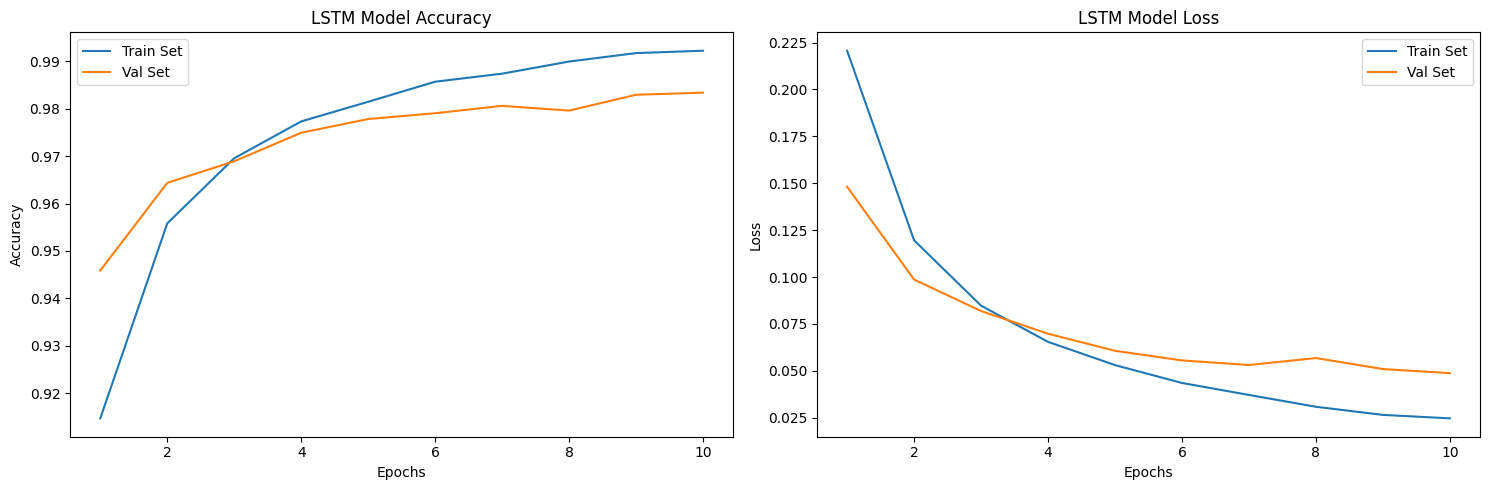

In [18]:
import matplotlib.pyplot as plt

# Train the model and store the returned model object in the variable 'r'
r = model.fit(X_train, y_train,epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Now access the 'history' attribute of the trained model
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, len(r.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

Model Prediction
Actually here using the model to detect fake and real news from sample news articles.

In [19]:
testSent =["Trey Gowdy destroys this clueless DHS employee when asking about the due process of getting on the terror watch list. Her response is priceless:  I m sorry, um, there s not a process afforded the citizen prior to getting on the list.  ",
       "Poland s new prime minister faces a difficult balancing act trying to repair bruised relations with the European Union without alienating the eurosceptic government s core voters. A Western-educated former banker who is fluent in German and English and was sworn in on Monday, Mateusz Morawiecki boasts the credentials needed to negotiate with Brussels. But any compromises to improve relations with Brussels, which sees the ruling Law and Justice (PiS) party as a threat to democracy, would risk upsetting the traditional, Catholic supporters who propelled it into power two years ago. It is a gamble that could backfire, and it is not yet clear how far Morawiecki, 49, and his party, dominated by former Prime Minister Jaroslaw Kaczynski, are ready to go to please Brussels.   The idea to build up international credibility seems rational,  said Jaroslaw Flis, a sociologist at the Jagiellonian University.  But such actions would have to be in complete contrast with what Mateusz Morawiecki would have to do domestically to prevent the PiS from falling apart."
      ]

def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(testSent)
    # pad sequences so that we get a N x T matrix
    testX = pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)
    prediction = model.predict(testX)
    df_test = pd.DataFrame(testSent, columns = ['test_sent'])

    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x>=0.5 else "Real")
    return df_test

#getting the prediction by passing list of sample news articles
df_testsent = predict_text(testSent)
df_testsent

1/1 [==============================] - 1s 1s/step


,test_sent,prediction
0,trey gowdy destroys clueless dhs employee aski...,Fake
1,poland new prime minister faces difficult bala...,Real
